## Descripción del conjunto de datos

In [17]:
import pandas as pd  
import os
from IPython.display import display, HTML
import plotly.express as px
from IPython.display import Image

# Tamaño inicial de los datos

In [18]:

directory = os.getcwd()
files = os.listdir(directory + '/data')

data = []
for f in files:
    if f != 'DIVERSIFICADOS.csv':
        dataframe = pd.read_csv(directory + '/data/' + f)
        data.append((f, dataframe.shape[0], dataframe.shape[1]))

df = pd.DataFrame(data, columns=['Archivo', 'Filas', 'Columnas'])
display(HTML(df.to_html(index=False)))

Archivo,Filas,Columnas
SACATEPEQUEZ.csv,309,18
SUCHITEPEQUEZ.csv,377,18
SAN MARCOS.csv,557,18
PETEN.csv,379,18
CIUDAD CAPITAL.csv,1537,18
CHIQUIMULA.csv,172,18
SANTA ROSA.csv,155,18
IZABAL.csv,360,18
SOLOLA.csv,140,18
RETALHULEU.csv,311,18


In [8]:
fig = px.bar(df, x='Archivo', y='Filas', title="Cantidad de datos por archivo")

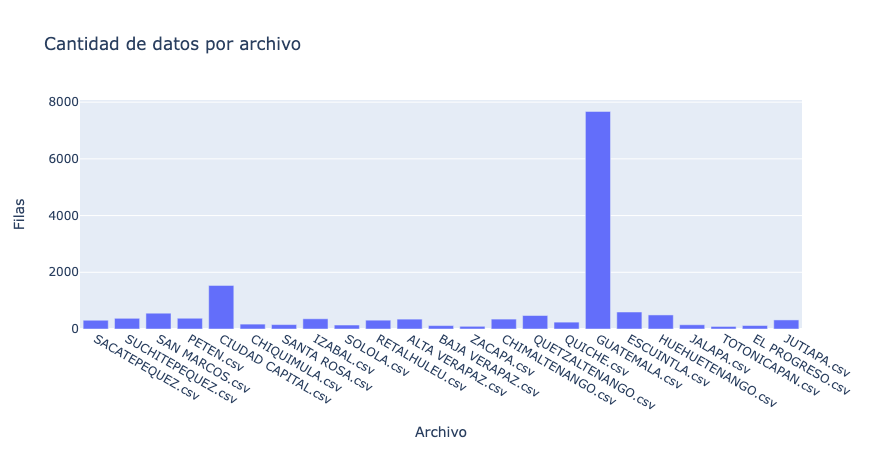

In [11]:
Image(filename="init_data.png")

# Limpieza

## Listado

Sin duda alguna todas las variables necesitan de limpieza ya que en todas las variables se han encontrado valores nulos.

Se debe de tener cuidado con los nombres de los institutos ya que hay muchas faltas ortográficas.

Se han encontrado un patrón de datos nulos como lo son ***"-"*** que estan de forma consecutiva, strings sin caracteres, Nans, etc en las siguientes variables:

- Establecimiento
- Distrito
- Telefono
- Director
- Supervisor
- Dirección

## Estrategia
- Código: No requiere limpieza.
- Distrito: Sustituir valores en blanco con NA
- Departamento: 
	- Eliminar espacios al inicio y al final.
	- Convertir todo a mayúsculas.
	- Hacer un encoding numérico para facilitar el procesamiento.
- Municipio: 
	- Eliminar espacios al inicio y al final.
	- Convertir todo a mayúsculas.
	- Hacer un encoding numérico.
- Establecimiento, Dirección:
	- Eliminar espacios al inicio y al final.
	- Convertir todo a mayúsculas.
- Teléfono:
	- Tomar en cuenta solo un teléfono cuando se vean dos. `79540830-79540909`.
	- Asegurar que tengan el número correcto de dígitos, de lo contrario es un teléfono inváldo y será reemplazado por `NA`.
- Supervisor, Director:
	- Tomar en cuenta valores como `--` como `NA`.
- Sector, Area, Status, Modalidad, Joranda, Plan:
	- Hacer encoding numérico.
- Nivel: 
	- Eliminar la columna dado que contiene un solo valor: Diversificado.



In [19]:
## Distrito 

data = pd.read_csv('data/DIVERSIFICADOS.csv', sep=',', encoding='latin-1')

## Remplazamos los espacios por NA
data = data.replace(r'^\s*$', pd.NA, regex=True)



In [20]:
## DePArtamento
from sklearn.preprocessing import LabelEncoder

# Getting the unique mapping of the original department values to the encoded values
department_mapping = data['DEPARTAMENTO'].str.strip().str.upper().unique()
department_mapping = {dep: idx for idx, dep in enumerate(department_mapping)}

# Displaying the department mapping
for key, value in department_mapping.items():
    print(key, ' : ', value)


#Trim spaces, convert to uppercase, and encode numerically
data['DEPARTAMENTO'] = data['DEPARTAMENTO'].str.strip().str.upper()
dep_encoder = LabelEncoder()
data['DEPARTAMENTO'] = dep_encoder.fit_transform(data['DEPARTAMENTO'])



ALTA VERAPAZ  :  0
BAJA VERAPAZ  :  1
CHIMALTENANGO  :  2
CHIQUIMULA  :  3
CIUDAD CAPITAL  :  4
EL PROGRESO  :  5
ESCUINTLA  :  6
HUEHUETENANGO  :  7
IZABAL  :  8
JALAPA  :  9
JUTIAPA  :  10
PETEN  :  11
QUETZALTENANGO  :  12
QUICHE  :  13
RETALHULEU  :  14
SACATEPEQUEZ  :  15
SAN MARCOS  :  16
SANTA ROSA  :  17
SOLOLA  :  18
SUCHITEPEQUEZ  :  19
TOTONICAPAN  :  20
ZACAPA  :  21


In [21]:

# Getting the unique mapping of the original department values to the encoded values
mun_mapping = data['MUNICIPIO'].str.strip().str.upper().unique()
mun_mapping = {dep: idx for idx, dep in enumerate(mun_mapping)}

# Displaying the department mapping
for key, value in mun_mapping.items():
    print(key, ' : ', value)

# Municipio: Trim spaces, convert to uppercase, and encode numerically
data['MUNICIPIO'] = data['MUNICIPIO'].str.strip().str.upper()
mun_encoder = LabelEncoder()
data['MUNICIPIO'] = mun_encoder.fit_transform(data['MUNICIPIO'])

COBAN  :  0
SANTA CRUZ VERAPAZ  :  1
SAN CRISTOBAL VERAPAZ  :  2
TACTIC  :  3
TAMAHU  :  4
SAN MIGUEL TUCURU  :  5
PANZOS  :  6
SENAHU  :  7
SAN PEDRO CARCHA  :  8
SAN JUAN CHAMELCO  :  9
LANQUIN  :  10
SANTA MARIA CAHABON  :  11
CHISEC  :  12
CHAHAL  :  13
FRAY BARTOLOME DE LAS CASAS  :  14
LA TINTA  :  15
RAXRUHA  :  16
SALAMA  :  17
SAN MIGUEL CHICAJ  :  18
RABINAL  :  19
CUBULCO  :  20
GRANADOS  :  21
SANTA CRUZ EL CHOL  :  22
SAN JERONIMO  :  23
PURULHA  :  24
CHIMALTENANGO  :  25
SAN JOSE POAQUIL  :  26
SAN MARTIN JILOTEPEQUE  :  27
SAN JUAN COMALAPA  :  28
SANTA APOLONIA  :  29
TECPAN GUATEMALA  :  30
PATZUN  :  31
SAN MIGUEL POCHUTA  :  32
PATZICIA  :  33
SANTA CRUZ BALANYA  :  34
ACATENANGO  :  35
SAN PEDRO YEPOCAPA  :  36
SAN ANDRES ITZAPA  :  37
PARRAMOS  :  38
ZARAGOZA  :  39
EL TEJAR  :  40
CHIQUIMULA  :  41
SAN JOSE LA ARADA  :  42
SAN JUAN ERMITA  :  43
JOCOTAN  :  44
CAMOTAN  :  45
OLOPA  :  46
ESQUIPULAS  :  47
CONCEPCION LAS MINAS  :  48
QUEZALTEPEQUE  :  49
SAN JACIN

In [22]:
from unidecode import unidecode
import re

# Function to clean the "Establecimiento" column
def clean_establecimiento(establecimiento):
    if pd.isna(establecimiento):
        return establecimiento
    
    # Replacing sequences of dashes and other unwanted characters with space
    establecimiento = re.sub(r'[-,\.]+', ' ', establecimiento).strip()
    
    # Applying unidecode to convert special characters to ASCII
    establecimiento = unidecode(establecimiento)
    
    # Replacing any remaining single dashes, dots, or commas
    establecimiento = establecimiento.replace('-', ' ').replace('.', ' ').replace(',', ' ').strip()

    return establecimiento if establecimiento else pd.NA

# Applying the cleaning function to the "Establecimiento" column
data['ESTABLECIMIENTO'] = data['ESTABLECIMIENTO'].apply(clean_establecimiento)

# Displaying some examples from the cleaned "Establecimiento" column
data['ESTABLECIMIENTO'].sample(10)


4206    INSTITUTO DE EDUCACION DIVERSIFICADA POR COOPE...
1290                COLEGIO INTERNACIONAL CAMBRIDGE (CIS)
4081                      COLEGIO PRIVADO LIC  DAVID VELA
5571        INSTITUTO NACIONAL DE EDUCACION DIVERSIFICADA
2734    PROGRAMA NACIONAL DE EDUCACIAN ALTERNATIVA PRONEA
3906        INSTITUTO NACIONAL DE EDUCACIAN DIVERSIFICADA
2566                                     'LICEO SAN JOSE'
5485                     INSTITUTO TECNICO DE NIVEL MEDIO
5159    COLEGIO PRIVADO URBANO MIXTO PRE UNIVERSITARIO...
1380                         COLEGIO PRACTICO SECRETARIAL
Name: ESTABLECIMIENTO, dtype: object

In [39]:
def clean_direccion(direccion):
    if pd.isna(direccion):
        return direccion
    
    # Replacing sequences of dashes and other unwanted characters with space
    direccion = re.sub(r'[,\.]+', ' ', direccion).strip()
    
    # Applying unidecode to convert special characters to ASCII (if available)
    direccion = unidecode(direccion)
    
    # Replacing any remaining single dashes, dots, or commas
    #direccion = direccion.replace('-', ' ').replace('.', ' ').replace(',', ' ').strip()

    return direccion if direccion else pd.NA

# Applying the cleaning function to the "Direccion" column
data['DIRECCION'] = data['DIRECCION'].apply(clean_direccion)


# Dirección: Trim spaces, convert to uppercase
data['DIRECCION'] = data['DIRECCION'].str.strip().str.upper()
data['DIRECCION'].sample(10)

2263          21 CALLE 9-40  COLONIA AURORA II
786     1A  CALLE 2-40 ZONA 1  CANTAN LA UNIAN
3401                  3A  AVENIDA 1-140 ZONA 3
1724                           28 AVE  A 33-50
5640                       ZONA 1 PLAYA GRANDE
491                    8A  AVENIDA 3-59 ZONA 2
3747          10A CALLE ENTRE 8A Y 9A AVENIDAS
5767                   3A  AVENIDA 7-69 ZONA 2
261                                        NaN
5259         CENTRO DE SAN MARTIN SACATEPEQUEZ
Name: DIRECCION, dtype: object

In [8]:
# Function to clean the "Telefono" column
def clean_telefono(telefono):
    # Splitting by '-' and taking the first part
    telefono = str(telefono).split('-')[0]
    
    # Checking if the length of the phone number is correct (e.g., 8 digits)
    if len(telefono) != 8:
        return 'NA'
    return telefono

# Applying the cleaning function to the "Telefono" column
data['TELEFONO'] = data['TELEFONO'].apply(clean_telefono)

# Displaying some examples from the cleaned "Telefono" column
data['TELEFONO'].sample(10)


5942    77737371
1126    22382723
7025    58255240
508     57674925
2940    78231966
5403    55680598
5764    58073087
2110    24394784
5768    77718861
7695    79383068
Name: TELEFONO, dtype: object

In [9]:

data['DIRECTOR'].sample(10)

def clean_director(director):
    if pd.isna(director):
        return director
    
    # Replacing sequences of dashes and other unwanted characters with NA
    director = re.sub(r'[-,\.]+', ' ', director).strip()
    
    # Applying unidecode to convert special characters to ASCII
    director = unidecode(director)
    
    # Replacing any remaining single dashes, dots, or commas
    director = director.replace('-', ' ').replace('.', ' ').replace(',', ' ').strip()

    return director if director else pd.NA

# Applying the cleaning function to the "Director" column
data['DIRECTOR'] = data['DIRECTOR'].apply(clean_director)

data['DIRECTOR'].sample(10)


3651        HECTOR ALFREDO MORALES MARTINEZ
3671                    JACINTO DIEGO TOMAS
6991          JOSA ANTONIO MARTANEZ ORDOAEZ
719                       GILBERTO AJU BATZ
4917               JUAN CARLOS MONZON LUTIN
7264                                    NaN
5072    JAIME AUGUSTO SANTISTEBAN BENAVENTE
1896              AURA MARINA MEJAA FUENTES
2910      CRISTIAN ALEXANDER PEREZ GONZALEZ
312                  MANUEL DE JESUS RALIOS
Name: DIRECTOR, dtype: object

In [10]:
# Supervisor

# Applying the cleaning function to the "Director" column
data['SUPERVISOR'] = data['SUPERVISOR'].apply(clean_director)

data['SUPERVISOR'].sample(10)

3450                 SIMEAN GRISDELA CASTILLO ALVARADO
310                          NELY MAGALY QUIJADA AYALA
2632                        EDGAR RUDY MORALES GODINEZ
3137    CLAUDIA LISETH CEBALLOS CASTILLO DE VILLALOBOS
7543                              MIGUEL AJPOP VASQUEZ
3601                      JUAN CARLOS MORALES GONZALEZ
1062                  CARLOS HUMBERTO GONZALEZ DE LEON
2684                          REMY ARTURO SINAY GUDIEL
7116                      ADA LORENA HERNANDEZ AGUILAR
2789                          REMY ARTURO SINAY GUDIEL
Name: SUPERVISOR, dtype: object

# Code Book


* **CODIGO** - (Cualitativo ordinal)
	- Descripción: Identifica los establecimientos educativos de todo el país. 
	- Posibles valores: Incluye valores de identificación únicos y numéricos para cada establecimiento educativo.
	
* **DISTRITO** - (Cualitativo nominal)
	- Descripción: Identifica el distrito en el cual se encuentra un centro educativo.
	- Posibles valores: Incluye valores de identificación únicos y numéricos para cada distrito.
	
* **DEPARTAMENTO** - (Cualitativo nominal)
	- Descripción: Departamento del territorio guatemalteco en el que se ubica un establecimiento educativo.
	- Posibles valores: Incluye los nombres de los 22 departamentos que conforman a Guatemala.
	- Encoding:
		- ALTA VERAPAZ  :  0
		- BAJA VERAPAZ  :  1
		- CHIMALTENANGO  :  2
		- CHIQUIMULA  :  3
		- CIUDAD CAPITAL  :  4
		- EL PROGRESO  :  5
		- ESCUINTLA  :  6
		- HUEHUETENANGO  :  7
		- IZABAL  :  8
		- JALAPA  :  9
		- JUTIAPA  :  10
		- PETEN  :  11
		- QUETZALTENANGO  :  12
		- QUICHE  :  13
		- RETALHULEU  :  14
		- SACATEPEQUEZ  :  15
		- SAN MARCOS  :  16
		- SANTA ROSA  :  17
		- SOLOLA  :  18
		- SUCHITEPEQUEZ  :  19
		- TOTONICAPAN  :  20
		- ZACAPA  :  21

* **MUNICIPIO** - (Cualitativo nominal)
	- Descripción: Municipio dentro de un departamento guatemalteco donde se encuentra una institución académica.
	- Posibles valores: Incluye los nombres de los municipios que pertenecen a un departamento en particular.
	- Encoding:
		- COBAN  :  0
		- SANTA CRUZ VERAPAZ  :  1
		- SAN CRISTOBAL VERAPAZ  :  2
		- TACTIC  :  3
		- TAMAHU  :  4
		- SAN MIGUEL TUCURU  :  5
		- PANZOS  :  6
		- SENAHU  :  7
		- SAN PEDRO CARCHA  :  8
		- SAN JUAN CHAMELCO  :  9
		- LANQUIN  :  10
		- SANTA MARIA CAHABON  :  11
		- CHISEC  :  12
		- CHAHAL  :  13
		- FRAY BARTOLOME DE LAS CASAS  :  14
		- LA TINTA  :  15
		- RAXRUHA  :  16
		- SALAMA  :  17
		- SAN MIGUEL CHICAJ  :  18
		- RABINAL  :  19
		- CUBULCO  :  20
		- GRANADOS  :  21
		- SANTA CRUZ EL CHOL  :  22
		- SAN JERONIMO  :  23
		- PURULHA  :  24
		- CHIMALTENANGO  :  25
		- SAN JOSE POAQUIL  :  26
		- SAN MARTIN JILOTEPEQUE  :  27
		- SAN JUAN COMALAPA  :  28
		- SANTA APOLONIA  :  29
		- TECPAN GUATEMALA  :  30
		- PATZUN  :  31
		- SAN MIGUEL POCHUTA  :  32
		- PATZICIA  :  33
		- SANTA CRUZ BALANYA  :  34
		- ACATENANGO  :  35
		- SAN PEDRO YEPOCAPA  :  36
		- SAN ANDRES ITZAPA  :  37
		- PARRAMOS  :  38
		- ZARAGOZA  :  39
		- EL TEJAR  :  40
		- CHIQUIMULA  :  41
		- SAN JOSE LA ARADA  :  42
		- SAN JUAN ERMITA  :  43
		- JOCOTAN  :  44
		- CAMOTAN  :  45
		- OLOPA  :  46
		- ESQUIPULAS  :  47
		- CONCEPCION LAS MINAS  :  48
		- QUEZALTEPEQUE  :  49
		- SAN JACINTO  :  50
		- IPALA  :  51
		- ZONA 1  :  52
		- ZONA 2  :  53
		- ZONA 3  :  54
		- ZONA 4  :  55
		- ZONA 5  :  56
		- ZONA 6  :  57
		- ZONA 7  :  58
		- ZONA 8  :  59
		- ZONA 9  :  60
		- ZONA 10  :  61
		- ZONA 11  :  62
		- ZONA 12  :  63
		- ZONA 13  :  64
		- ZONA 14  :  65
		- ZONA 15  :  66
		- ZONA 16  :  67
		- ZONA 17  :  68
		- ZONA 18  :  69
		- ZONA 19  :  70
		- ZONA 21  :  71
		- ZONA 24  :  72
		- GUASTATOYA  :  73
		- MORAZAN  :  74
		- SAN AGUSTIN ACASAGUASTLAN  :  75
		- SAN CRISTOBAL ACASAGUASTLAN  :  76
		- EL JICARO  :  77
		- SANSARE  :  78
		- SANARATE  :  79
		- SAN ANTONIO LA PAZ  :  80
		- ESCUINTLA  :  81
		- SANTA LUCIA COTZUMALGUAPA  :  82
		- LA DEMOCRACIA  :  83
		- SIQUINALA  :  84
		- MASAGUA  :  85
		- TIQUISATE  :  86
		- LA GOMERA  :  87
		- GUANAGAZAPA  :  88
		- SAN JOSE  :  89
		- IZTAPA  :  90
		- PALIN  :  91
		- SAN VICENTE PACAYA  :  92
		- NUEVA CONCEPCION  :  93
		- SIPACATE  :  94
		- HUEHUETENANGO  :  95
		- CHIANTLA  :  96
		- MALACATANCITO  :  97
		- CUILCO  :  98
		- NENTON  :  99
		- SAN PEDRO NECTA  :  100
		- JACALTENANGO  :  101
		- SAN PEDRO SOLOMA  :  102
		- SAN ILDEFONSO IXTAHUACAN  :  103
		- SANTA BARBARA  :  104
		- LA LIBERTAD  :  105
		- SAN MIGUEL ACATAN  :  106
		- SAN RAFAEL LA INDEPENDENCIA  :  107
		- TODOS SANTOS CUCHUMATAN  :  108
		- SAN JUAN ATITAN  :  109
		- SANTA EULALIA  :  110
		- SAN MATEO IXTATAN  :  111
		- COLOTENANGO  :  112
		- SAN SEBASTIAN HUEHUETENANGO  :  113
		- TECTITAN  :  114
		- CONCEPCION HUISTA  :  115
		- SAN JUAN IXCOY  :  116
		- SAN ANTONIO HUISTA  :  117
		- SAN SEBASTIAN COATAN  :  118
		- SANTA CRUZ BARILLAS  :  119
		- AGUACATAN  :  120
		- SAN RAFAEL PETZAL  :  121
		- SANTIAGO CHIMALTENANGO  :  122
		- SANTA ANA HUISTA  :  123
		- UNION CANTINIL  :  124
		- PETATAN  :  125
		- PUERTO BARRIOS  :  126
		- LIVINGSTON  :  127
		- EL ESTOR  :  128
		- MORALES  :  129
		- LOS AMATES  :  130
		- JALAPA  :  131
		- SAN PEDRO PINULA  :  132
		- SAN LUIS JILOTEPEQUE  :  133
		- SAN MANUEL CHAPARRON  :  134
		- SAN CARLOS ALZATATE  :  135
		- MONJAS  :  136
		- MATAQUESCUINTLA  :  137
		- JUTIAPA  :  138
		- EL PROGRESO  :  139
		- SANTA CATARINA MITA  :  140
		- AGUA BLANCA  :  141
		- ASUNCION MITA  :  142
		- YUPILTEPEQUE  :  143
		- ATESCATEMPA  :  144
		- JEREZ  :  145
		- EL ADELANTO  :  146
		- ZAPOTITLAN  :  147
		- COMAPA  :  148
		- JALPATAGUA  :  149
		- CONGUACO  :  150
		- MOYUTA  :  151
		- PASACO  :  152
		- SAN JOSE ACATEMPA  :  153
		- QUESADA  :  154
		- FLORES  :  155
		- SAN BENITO  :  156
		- SAN ANDRES  :  157
		- SAN FRANCISCO  :  158
		- SANTA ANA  :  159
		- DOLORES  :  160
		- SAN LUIS  :  161
		- SAYAXCHE  :  162
		- MELCHOR DE MENCOS  :  163
		- POPTUN  :  164
		- LAS CRUCES  :  165
		- EL CHAL  :  166
		- QUETZALTENANGO  :  167
		- SALCAJA  :  168
		- OLINTEPEQUE  :  169
		- SAN CARLOS SIJA  :  170
		- SIBILIA  :  171
		- CABRICAN  :  172
		- CAJOLA  :  173
		- SAN MIGUEL SIGUILA  :  174
		- SAN JUAN OSTUNCALCO  :  175
		- SAN MATEO  :  176
		- CONCEPCION CHIQUIRICHAPA  :  177
		- SAN MARTIN SACATEPEQUEZ  :  178
		- ALMOLONGA  :  179
		- CANTEL  :  180
		- HUITAN  :  181
		- ZUNIL  :  182
		- COLOMBA COSTA CUCA  :  183
		- SAN FRANCISCO LA UNION  :  184
		- EL PALMAR  :  185
		- COATEPEQUE  :  186
		- GENOVA COSTA CUCA  :  187
		- FLORES COSTA CUCA  :  188
		- LA ESPERANZA  :  189
		- PALESTINA DE LOS ALTOS  :  190
		- SANTA CRUZ DEL QUICHE  :  191
		- CHICHE  :  192
		- CHINIQUE  :  193
		- ZACUALPA  :  194
		- CHAJUL  :  195
		- SANTO TOMAS CHICHICASTENANGO  :  196
		- PATZITE  :  197
		- SAN ANTONIO ILOTENANGO  :  198
		- SAN PEDRO JOCOPILAS  :  199
		- CUNEN  :  200
		- SAN JUAN COTZAL  :  201
		- JOYABAJ  :  202
		- NEBAJ  :  203
		- SAN ANDRES SAJCABAJA  :  204
		- SAN MIGUEL USPANTAN  :  205
		- SACAPULAS  :  206
		- SAN BARTOLOME JOCOTENANGO  :  207
		- CANILLA  :  208
		- CHICAMAN  :  209
		- IXCAN  :  210
		- PACHALUN  :  211
		- RETALHULEU  :  212
		- SAN SEBASTIAN  :  213
		- SANTA CRUZ MULUA  :  214
		- SAN MARTIN ZAPOTITLAN  :  215
		- SAN FELIPE  :  216
		- SAN ANDRES VILLA SECA  :  217
		- CHAMPERICO  :  218
		- NUEVO SAN CARLOS  :  219
		- EL ASINTAL  :  220
		- ANTIGUA GUATEMALA  :  221
		- JOCOTENANGO  :  222
		- PASTORES  :  223
		- SUMPANGO  :  224
		- SANTO DOMINGO XENACOJ  :  225
		- SANTIAGO SACATEPEQUEZ  :  226
		- SAN BARTOLOME MILPAS ALTAS  :  227
		- SAN LUCAS SACATEPEQUEZ  :  228
		- SANTA LUCIA MILPAS ALTAS  :  229
		- MAGDALENA MILPAS ALTAS  :  230
		- SANTA MARIA DE JESUS  :  231
		- CIUDAD VIEJA  :  232
		- SAN MIGUEL DUENAS  :  233
		- ALOTENANGO  :  234
		- SAN ANTONIO AGUAS CALIENTES  :  235
		- SANTA CATARINA BARAHONA  :  236
		- SAN MARCOS  :  237
		- SAN PEDRO SACATEPEQUEZ  :  238
		- SAN ANTONIO SACATEPEQUEZ  :  239
		- COMITANCILLO  :  240
		- SAN MIGUEL IXTAHUACAN  :  241
		- CONCEPCION TUTUAPA  :  242
		- TACANA  :  243
		- SIBINAL  :  244
		- TAJUMULCO  :  245
		- TEJUTLA  :  246
		- SAN RAFAEL PIE DE LA CUESTA  :  247
		- NUEVO PROGRESO  :  248
		- EL TUMBADOR  :  249
		- SAN JOSE EL RODEO  :  250
		- MALACATAN  :  251
		- CATARINA  :  252
		- AYUTLA  :  253
		- OCOS  :  254
		- SAN PABLO  :  255
		- EL QUETZAL  :  256
		- LA REFORMA  :  257
		- PAJAPITA  :  258
		- IXCHIGUAN  :  259
		- SAN JOSE OJETENAM  :  260
		- SAN CRISTOBAL CUCHO  :  261
		- SIPACAPA  :  262
		- ESQUIPULAS PALO GORDO  :  263
		- RIO BLANCO  :  264
		- SAN LORENZO  :  265
		- LA BLANCA  :  266
		- CUILAPA  :  267
		- BARBERENA  :  268
		- SANTA ROSA DE LIMA  :  269
		- CASILLAS  :  270
		- SAN RAFAEL LAS FLORES  :  271
		- ORATORIO  :  272
		- SAN JUAN TECUACO  :  273
		- CHIQUIMULILLA  :  274
		- TAXISCO  :  275
		- SANTA MARIA IXHUATAN  :  276
		- GUAZACAPAN  :  277
		- SANTA CRUZ NARANJO  :  278
		- PUEBLO NUEVO VIÃAS  :  279
		- NUEVA SANTA ROSA  :  280
		- SOLOLA  :  281
		- SAN JOSE CHACAYA  :  282
		- SANTA MARIA VISITACION  :  283
		- SANTA LUCIA UTATLAN  :  284
		- NAHUALA  :  285
		- SANTA CATARINA IXTAHUACAN  :  286
		- SANTA CLARA LA LAGUNA  :  287
		- SAN ANDRES SEMETABAJ  :  288
		- PANAJACHEL  :  289
		- SAN ANTONIO PALOPO  :  290
		- SAN LUCAS TOLIMAN  :  291
		- SAN PABLO LA LAGUNA  :  292
		- SAN MARCOS LA LAGUNA  :  293
		- SAN JUAN LA LAGUNA  :  294
		- SAN PEDRO LA LAGUNA  :  295
		- SANTIAGO ATITLAN  :  296
		- MAZATENANGO  :  297
		- CUYOTENANGO  :  298
		- SAN FRANCISCO ZAPOTITLAN  :  299
		- SAN BERNARDINO  :  300
		- SAN JOSE EL IDOLO  :  301
		- SANTO DOMINGO SUCHITEPEQUEZ  :  302
		- SAMAYAC  :  303
		- SAN PABLO JOCOPILAS  :  304
		- SAN ANTONIO SUCHITEPEQUEZ  :  305
		- SAN GABRIEL  :  306
		- CHICACAO  :  307
		- PATULUL  :  308
		- SANTO TOMAS LA UNION  :  309
		- ZUNILITO  :  310
		- PUEBLO NUEVO  :  311
		- RIO BRAVO  :  312
		- SAN JOSE LA MAQUINA  :  313
		- TOTONICAPAN  :  314
		- SAN CRISTOBAL TOTONICAPAN  :  315
		- SAN FRANCISCO EL ALTO  :  316
		- SAN ANDRES XECUL  :  317
		- MOMOSTENANGO  :  318
		- SANTA MARIA CHIQUIMULA  :  319
		- SANTA LUCIA LA REFORMA  :  320
		- SAN BARTOLO AGUAS CALIENTES  :  321
		- ZACAPA  :  322
		- ESTANZUELA  :  323
		- RIO HONDO  :  324
		- GUALAN  :  325
		- TECULUTAN  :  326
		- USUMATLAN  :  327
		- CABAÃAS  :  328
		- SAN DIEGO  :  329
		- LA UNION  :  330
		- HUITE  :  331
		- SAN JORGE  :  332



* **ESTABLECIMIENTO** - (Cualitativo nominal)
	- Descripción: Nombre de un establecimiento educativo.
	- Posibles valores: Incluye los nombres de las instituciones académicas.

* **DIRECCIÓN** - (Cualitativo nominal)
	- Descripción: Descripción de la ubicación de un establecimiento educativo.
	- Posibles valores: Incluye nombres de calles, avenidas, zonas, números u otros detalles pertenencientes a la descripción de la ubicación del establecimiento educativo.

* **TELÉFONO** - (Cualitativo nominal)
	- Descripción: Número de teléfono al que se puede poner en contacto con el establecimiento educativo.
	- Posibles valores: Secuencias numéricas de 8 dígitos correspondientes al número de teléfono para contactarse con la institución.

* **SUPERVISOR** - (Cualitativo nominal)
	- Descripción: Nombre del supervisor de la institución académica.
	- Posibles valores: Nombres de personas suoervisoras de la institución.

* **DIRECTOR** - (Cualitativo nominal)
	- Descripción: Nombre del director de la institución académica.
	- Posibles valores: Nombres de personas que son directores de la institución.

* **SECTOR** - (Cualitativo nominal)
	- Descripción: Describe el tipo de sector que es la institución académica.
	- Posibles valores: Tipo de sector que caracteriza la institución.
	- Encoding:
		- PRIVADO - 0
		- OFICIAL - 1
		- COOPERATIVO - 2
		- MUNICIPAL - 3
		...

* **ÁREA** - (Cualitativo nominal)
	- Descripción: Describe el tipo de área que es la institución académica.
	- Posibles valores: Tipo de área que es la institución.
	- Encoding:
		- URBANA - 0
		- RURAL - 1
		...

* **STATUS** - (Cualitativo nominal)
	- Descripción: Describe el estado actual de como se encuentra la institutción académica.
	- Posibles valores: El estado de la institiución como (ABIERTA, CERRADA TEMPORALMENTE)
	- Encoding:
		- CERRADA TEMPORALMENTE - 0
		- ABIERTA - 1
		...

* **MODALIDAD** - (Cualitativo nominal)
	- Descripción: Describe el tipo de modalidad que manejan las instituciones.
	- Posibles valores: La cantidad de idiomas que emplean de forma descriptiva.
	- Encoding:
		- MATUTINA - 0
		- DOBLE - 1
		...

* **JORNADA** - (Cualitativo nominal)
	- Descripción: Describe el tipo de jornada que maneja la institución.
	- Posibles valores: El horario del tipo de jornada que ofrece cada institución.
	- Encoding:
		- MATUTINA - 0
		- VESPERTINA - 1
		- DOBLE - 2
		- SIN JORNADA - 3

* **PLAN** - (Cualitativo nominal)
	- Descripción: Describe el tipo de plan de horarios que ofrece la institución.
	- Posibles valores: Incluye los tipos de planes que ofrece la institución. 
	- Encodign:
		- FIN DE SEMANA - 0
		- A DISTANCIA - 1
		- SABATINO - 2
		- SEMIPRESENCIAL - 3
		- DIARIO - 4
		...

* **DEPARTAMENTAL** - (Cualitativo nominal)
	- Descripción: Describe el departamento en donde se encuentra la institución.
	- Posibles valores: Incluye los nombres de los 22 departamentos que conforman a Guatemala.
